<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/%0813_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Input
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
save_path = '/content/gdrive/MyDrive/pytest_img/_generated_images' # Changed 'Mydrive' to 'MyDrive'
if not os.path.exists(os.path.join(save_path, 'MNIST_AE/')):
    os.makedirs(os.path.join(save_path, 'MNIST_AE/'))

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
autoencoder = Sequential()
autoencoder.add(Input(shape=(28,28,1)))
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [ ]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 164ms/step - loss: 0.3103 - val_loss: 0.1319
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - loss: 0.1270 - val_loss: 0.1144
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - loss: 0.1136 - val_loss: 0.1078
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 138ms/step - loss: 0.1075 - val_loss: 0.1030
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 133ms/step - loss: 0.1036 - val_loss: 0.1006
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - loss: 0.1010 - val_loss: 0.0982
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - loss: 0.0987 - val_loss: 0.0958
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 142ms/step - loss: 0.0967 - val_loss: 0.0942
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 132ms/step - loss: 0.0953 - val_loss: 0.0929
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - loss: 0.0942 - val_loss: 0.0919


In [ ]:
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(5, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


<Figure size 500x200 with 0 Axes>

<Figure size 500x200 with 0 Axes>

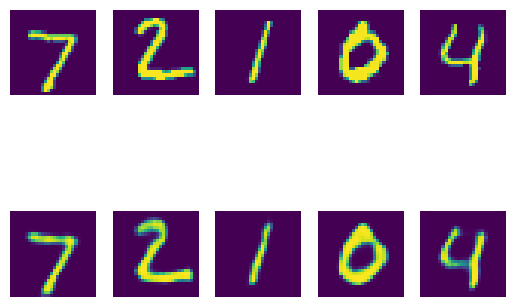

In [ ]:
fig,axs = plt.subplots(2,5)
count = 0

for k in range(5):
    axs[0, k].imshow(X_test[count])
    axs[0, k].axis('off')
    axs[1, k].imshow(ae_imgs[count])
    axs[1, k].axis('off')
    count += 1
    fig.savefig(os.path.join(save_path, 'MNIST_AE/') + 'ae_mnnist.png')